# Explore here

It's recommended to use this notebook for exploration purposes.

In [ ]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Read/get URL and check to make sure that status = 200
url = "https://en.wikipedia.org/wiki/List_of_Spotify_streaming_records"
response = requests.get(url)

if response.status_code != 200:
    raise Exception(f"Error accessing page: {response.status_code}")
print ("status:", response.status_code)

status: 200


In [ ]:
# Understand how many tables there are

import pandas as pd

table = pd.read_html(url)
print(f"{len(table)} tables were found") 


27 tables were found


In [ ]:
# Visualize the first table for understanding of what is in the table

df=table[0]
df.head(15)


,Rank,Song,Artist(s),Streams (billions),Release date,Ref.
0,1,"""Blinding Lights""",The Weeknd,4.916,29 November 2019,[2]
1,2,"""Shape of You""",Ed Sheeran,4.444,6 January 2017,[3]
2,3,"""Starboy""",The Weeknd and Daft Punk,3.978,21 September 2016,[4]
3,4,"""Someone You Loved""",Lewis Capaldi,3.964,8 November 2018,[5]
4,5,"""As It Was""",Harry Styles,3.956,1 April 2022,[6]
5,6,"""Sweater Weather""",The Neighbourhood,3.876,3 December 2012,[7]
6,7,"""Sunflower""",Post Malone and Swae Lee,3.875,18 October 2018,[8]
7,8,"""One Dance""",Drake with Wizkid and Kyla,3.698,5 April 2016,[9]
8,9,"""Stay""",The Kid Laroi and Justin Bieber,3.595,9 July 2021,[10]
9,10,"""Perfect""",Ed Sheeran,3.513,3 March 2017,[11]


In [74]:
# Store data into SQL Lite

conn=sqlite3.connect("spotify_streams.db")

df.to_sql("most_streamed_songs", conn, if_exists="replace", index=False)
conn.close


<function Connection.close()>

In [55]:
# Create new data frame with an updated "Release Date" column to look more succinct

df.columns = ["Rank", "Song", "Artist", "Streams(billions)", "Release Date"]
df = df.iloc[:-1]

df = df.copy()

df["Release Date"] = pd.to_datetime(df["Release Date"])
df["Streams(billions)"] = df["Streams(billions)"].astype(float)

df

,Rank,Song,Artist,Streams(billions),Release Date
1,2,"""Shape of You""",Ed Sheeran,4.444,2017-01-06
2,3,"""Starboy""",The Weeknd and Daft Punk,3.978,2016-09-21
3,4,"""Someone You Loved""",Lewis Capaldi,3.964,2018-11-08
4,5,"""As It Was""",Harry Styles,3.956,2022-04-01
5,6,"""Sweater Weather""",The Neighbourhood,3.876,2012-12-03
...,...,...,...,...,...
94,95,"""Levitating""",Dua Lipa and DaBaby,2.362,2020-10-01
95,96,"""New Rules""",Dua Lipa,2.354,2017-06-02
96,97,"""Someone Like You""",Adele,2.340,2011-01-24
97,98,"""Too Good At Goodbyes""",Sam Smith,2.332,2017-09-08


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

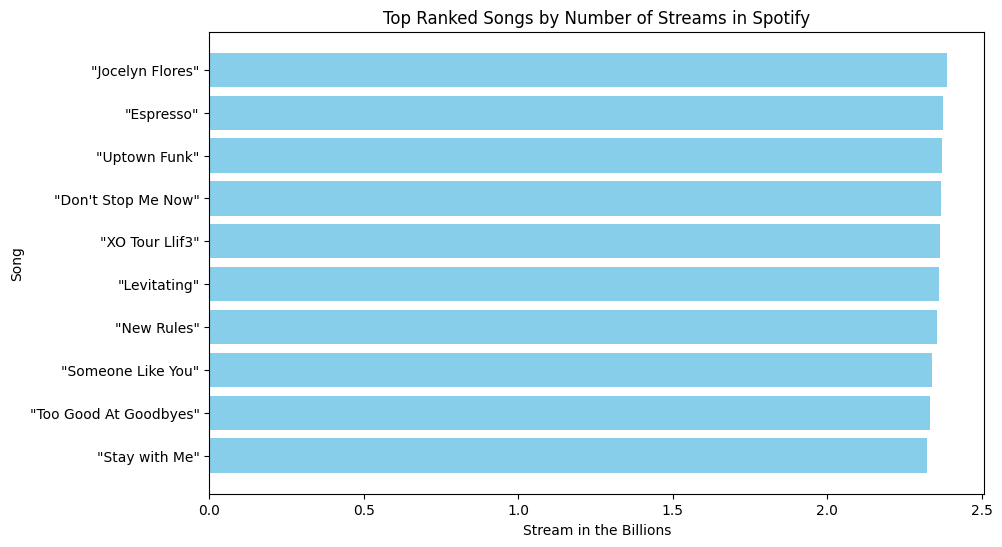

In [63]:
# Sort DataFrame by streams in ascending order and the plot it
df_sorted = df.sort_values(by="Streams(billions)", ascending=True).head(10)

plt.figure(figsize=(10, 6))
plt.barh(df_sorted["Song"], df_sorted["Streams(billions)"], color='skyblue')
plt.xlabel("Stream in the Billions")
plt.ylabel("Song")
plt.title("Top Ranked Songs by Number of Streams in Spotify")
plt.tight_layout

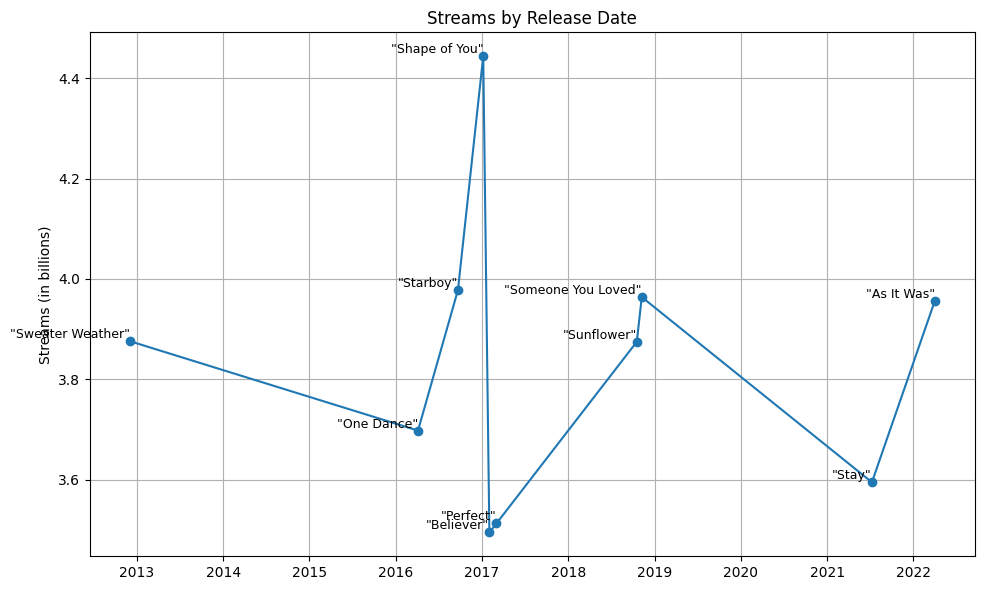

In [73]:
top10_sorted_by_date = top10.sort_values(by="Release Date")

plt.figure(figsize=(10, 6))
plt.plot(top10_sorted_by_date["Release Date"], top10_sorted_by_date["Streams(billions)"], marker='o')
plt.ylabel("Streams (in billions)")
plt.title("Streams by Release Date")
plt.grid(True)
for i, row in top10_sorted_by_date.iterrows():
    plt.text(row["Release Date"], 
             row["Streams(billions)"], 
             row["Song"], 
             fontsize=9, 
             ha='right', 
             va='bottom')
plt.tight_layout()
plt.show()